In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
from datetime import datetime
import seaborn as sn

In [3]:
df = pd.read_csv('G_PSQL_data/JAN_sample_raw.txt')

C:\Users\broug\AppData\Local\Temp\ipykernel_6120\1075573633.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('G_PSQL_data/JAN_sample_raw.txt')


In [12]:
sample.drop(columns=['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'no_name', 'longest_add_gtime', 'total_add_gtime', 'canellation_code', 'dup', 'diverted', 'cancelled'], inplace=True)

In [26]:
sample['dep_time'] = pd.to_datetime(sample['dep_time'], format='%H%M', errors='coerce')
sample['arr_time'] = pd.to_datetime(sample['arr_time'], format='%H%M', errors='coerce')

In [18]:
nulls = sample.isnull().sum()
(nulls / len(sample) * 100).sort_values(ascending=False)

arr_time               2.006382
arr_delay              1.787115
air_time               1.770180
actual_elapsed_time    1.770180
dep_time               1.605284
taxi_in                1.602610
wheels_on              1.600827
dep_delay              1.578544
taxi_out               1.559826
wheels_off             1.558043
tail_num               0.368119
crs_elapsed_time       0.000891
cancelled              0.000000
dup                    0.000000
crs_arr_time           0.000000
flights                0.000000
diverted               0.000000
fl_date                0.000000
mkt_unique_carrier     0.000000
crs_dep_time           0.000000
dest_city_name         0.000000
dest                   0.000000
dest_airport_id        0.000000
origin_city_name       0.000000
origin                 0.000000
origin_airport_id      0.000000
op_carrier_fl_num      0.000000
op_unique_carrier      0.000000
mkt_carrier_fl_num     0.000000
mkt_carrier            0.000000
branded_code_share     0.000000
distance

In [22]:
from functions import rename_brand_code, remove_outliers
sample = rename_brand_code(sample)

In [24]:
sample = remove_outliers(sample)

In [3]:
sample.drop(columns='Unnamed: 0', inplace=True)

In [178]:
# distance is split into quantiles which correspond to 31-416, 417-867, 868, 4963
from functions import process_distance
df = process_distance(df)

TypeError: an integer is required (got type str)

In [6]:
sample.to_csv('G_PSQL_data/JAN_sample_processing.csv', index=False)

In [14]:
newdf.to_csv('G_PSQL_data/jan_cleaned.csv', index=False)

#### passenger table processing

In [68]:
sample = pd.read_csv('G_PSQL_data/JAN_passengers.txt', parse_dates=True)

In [69]:
flights = pd.read_csv('G_PSQL_data/super_cleaned.csv')
flights

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dest,dist_cats,origin_airport_id,dest_airport_id,arr_delay,crs_elapsed_time,dep_hour,arr_hour,week_day
0,2019-01-01 00:01:00,NK,NK,LAX,OAK,short,12892,13796,-6.0,81.0,19,20,1
1,2019-01-01 00:01:00,AA,OH,DCA,BDL,short,11278,10529,-15.0,75.0,13,13,1
2,2019-01-01 00:01:00,AA,OH,CLT,BTV,medium,11057,10785,-16.0,132.0,18,20,1
3,2019-01-01 00:01:00,AA,OH,CLT,MKE,medium,11057,13342,-20.0,136.0,16,17,1
4,2019-01-01 00:01:00,NK,NK,MCO,SJU,long,13204,14843,17.0,155.0,23,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108432,2018-01-31 00:01:00,DL,G7,MSP,RDU,long,13487,14492,-33.0,161.0,15,18,2
108433,2018-01-31 00:01:00,DL,G7,BNA,RDU,medium,10693,14492,64.0,225.0,20,22,2
108434,2018-01-31 00:01:00,DL,G7,MEM,DTW,medium,13244,11433,-21.0,119.0,6,8,2
108435,2018-01-31 00:01:00,DL,CP,LAS,LAX,short,12889,12892,-7.0,90.0,9,10,2


In [70]:
sample = sample[sample['year'] > 2016]

In [62]:
sample = sample[(sample['dest_country_name'] =='United States') & (sample['origin_country_name'] == 'United States')]

In [66]:
sample.drop(columns=['dest_country', 'dest_country_name', 'origin_country_name', 'origin_country', 'data_source'], inplace=True)

C:\Users\broug\AppData\Local\Temp\ipykernel_336\1267708381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.drop(columns=['dest_country', 'dest_country_name', 'origin_country_name', 'origin_country', 'data_source'], inplace=True)


In [136]:
sample = sample[(sample['dest_country'] == 'US') & (sample['origin_country'] == 'US')]

In [144]:
sample['op_unique_carrier'] = sample['unique_carrier']

C:\Users\broug\AppData\Local\Temp\ipykernel_336\2854837492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['op_unique_carrier'] = sample['unique_carrier']


In [89]:
df.drop(columns=['year', 'month'], inplace=True)

In [91]:
df.to_csv('G_PSQL_data/flights_passengers.csv', index=False)

In [134]:
df['total_passengers'] = df['passengers']

In [148]:
dest_airport = df.groupby(['dest_airport_id'], as_index=False).agg({'passengers': 'sum', 'mail': 'mean', 'freight': 'mean', 'arr_delay': 'mean', 'unique_carrier': 'count'}).sort_values(by='passengers', ascending=False)

In [149]:
origin_airport = df.groupby('origin_airport_id', as_index=False).agg({'passengers': 'sum', 'mail': 'mean', 'freight': 'mean', 'arr_delay': 'mean', 'unique_carrier': 'size'})

In [151]:
origin_airport['cargo'] = origin_airport['mail'] + origin_airport['freight']

In [152]:
origin_airport['cargo/carrier'] = origin_airport['cargo'] / origin_airport['unique_carrier']
origin_airport['passengers/carrier'] = origin_airport['passengers'] / origin_airport['unique_carrier']
origin_airport['cargo/passengers'] = origin_airport['cargo'] / origin_airport['passengers'] 
origin_airport.drop(columns=['mail', 'freight'], inplace=True)
origin_airport

,origin_airport_id,passengers,arr_delay,unique_carrier,cargo,cargo/carrier,passengers/carrier,cargo/passengers
0,10135,495119,11.238754,289,19.166090,0.066319,1713.214533,0.000039
1,10136,421992,11.861111,216,355.333333,1.645062,1953.666667,0.000842
2,10140,10211746,-2.496269,3752,43383.426439,11.562747,2721.680704,0.004248
3,10141,50479,-4.727273,22,0.000000,0.000000,2294.500000,0.000000
4,10146,81284,-6.357143,42,0.000000,0.000000,1935.333333,0.000000
...,...,...,...,...,...,...,...,...
355,15841,26158,-11.666667,36,10507.055556,291.862654,726.611111,0.401677
356,15919,3122420,1.142930,1952,97.253074,0.049822,1599.600410,0.000031
357,15991,8329,-15.393939,33,7836.939394,237.483012,252.393939,0.940922
358,16101,347598,2.925926,54,820.000000,15.185185,6437.000000,0.002359


In [162]:
origin_airport.sort_values(by='arr_delay', ascending=False)

,origin_airport_id,passengers,arr_delay,unique_carrier,cargo,cargo/carrier,passengers/carrier,cargo/passengers
244,13832,1916,92.000000,3,0.000000,0.000000,638.666667,0.000000
254,14006,24814,39.160000,25,0.000000,0.000000,992.560000,0.000000
158,12244,58475,39.043478,46,345.543478,7.511815,1271.195652,0.005909
17,10333,5261,39.000000,20,0.000000,0.000000,263.050000,0.000000
275,14259,8319,35.333333,12,0.000000,0.000000,693.250000,0.000000
...,...,...,...,...,...,...,...,...
314,14802,1389,-17.333333,3,0.000000,0.000000,463.000000,0.000000
274,14256,41207,-18.190476,63,12229.873016,194.124969,654.079365,0.296791
329,15008,8506,-18.666667,6,0.000000,0.000000,1417.666667,0.000000
180,12519,11116,-22.625000,16,0.000000,0.000000,694.750000,0.000000


<AxesSubplot:xlabel='passengers', ylabel='arr_delay'>

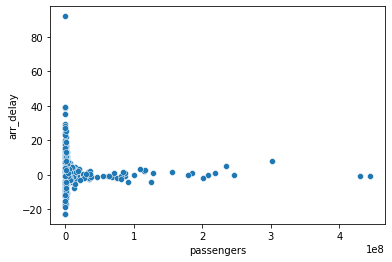

In [172]:
sn.scatterplot(x=origin_airport['passengers'], y=origin_airport['arr_delay'])

In [191]:
df = pd.read_csv('G_PSQL_data/JAN_sample_no_outliers.csv')
df = df[df['crs_elapsed_time'] < 500]

In [192]:
df['dist_cats'] = pd.qcut(df['distance'], 3, labels=['short', 'medium', 'long'])


In [193]:
df['fl_date'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d', errors='coerce')

In [194]:
df.drop(columns='Unnamed: 0', inplace=True)

In [209]:
df.to_csv('final_process.csv', index=False)

#### hourly flights

In [198]:
df = pd.read_csv('final_process.csv')

In [1]:
df = pd.read_csv('G_PSQL_data/JAN_sample_raw.txt', parse_dates=['crs_dep_time', 'crs_arr_time'])

NameError: name 'pd' is not defined

In [4]:
df['late_binary'] = 0
late = df['arr_delay'] > 0
df.loc[late, 'late_binary'] = 1

In [7]:
from functions import *
df['dep_hour'] = pd.to_datetime(df['crs_dep_time'], format='%H%M', errors='coerce').round('60min').dt.hour
df['arr_hour'] = pd.to_datetime(df['crs_arr_time'], format='%H%M', errors='coerce').round('60min').dt.hour
df['weekday'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d', errors='coerce').dt.weekday
df['month_day'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d', errors='coerce').dt.day

In [8]:
from functions import process_times, airport_hour_avgs
df = process_times(df)
airport_hour_avgs(df)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dep_hour,arr_hour,weekday,month_day,airport_weekly_hourly_arr,airport_weekly_hourly_dep,airport_arr_hourly_late_percent,airport_dep_hourly_late_percent,arr_taxi,dep_taxi
0,2019-01-01,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,19.0,20.0,1,1,-4.100000,35.400000,42.105263,41.717791,5.881163,18.940764
1,2019-01-30,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,19.0,20.0,2,30,-6.444444,14.555556,42.105263,41.717791,5.881163,18.940764
2,2019-01-03,NK,NK,NK,955,NK,N504NK,955,12892,LAX,...,19.0,20.0,3,3,5.111111,24.555556,42.105263,41.717791,5.881163,18.940764
3,2019-01-10,WN,WN,WN,144,WN,N7736A,144,12892,LAX,...,19.0,20.0,3,10,5.111111,24.555556,42.105263,41.717791,5.881163,18.940764
4,2018-01-04,WN,WN,WN,1410,WN,N795SW,1410,12892,LAX,...,19.0,20.0,3,4,5.111111,24.555556,42.105263,41.717791,5.881163,18.940764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111813,2018-01-01,UA,UA_CODESHARE,UA,6391,9K,N14834,6391,14955,SPN,...,14.0,14.0,0,1,-15.000000,-20.000000,0.000000,0.000000,5.000000,8.416667
111814,2018-01-07,UA,UA_CODESHARE,UA,6391,9K,N14834,6391,14582,ROP,...,15.0,15.0,6,7,-5.000000,-5.000000,0.000000,0.000000,4.375000,7.500000
111815,2018-01-28,UA,UA_CODESHARE,UA,6391,9K,N45838,6391,14582,ROP,...,15.0,15.0,6,28,-5.000000,-5.000000,0.000000,0.000000,4.375000,7.500000
111816,2018-01-17,UA,UA_CODESHARE,UA,6390,9K,N45838,6390,14582,ROP,...,13.0,14.0,2,17,0.000000,0.000000,0.000000,0.000000,4.400000,7.500000


#### airport table

In [21]:
airports = df.groupby('dest_airport_id').agg(late=('late_binary', 'sum'), total=('late_binary', 'size'))
airports['total_percent_late'] = (airports['late'] / airports['total']) * 100
airports.drop(columns=['total', 'late'], inplace=True)

In [38]:
df.groupby(['dest_airport_id', 'weekday', 'arr_hour'], as_index=False).agg(airport_weekly_hourly_arr=('arr_delay', 'mean'))

,dest_airport_id,weekday,arr_hour,airport_weekly_hourly_arr
0,10135,0,10.0,-3.50
1,10135,0,12.0,86.00
2,10135,0,16.0,16.00
3,10135,0,17.0,9.75
4,10135,0,19.0,-26.00
...,...,...,...,...
18776,16218,6,0.0,-4.00
18777,16218,6,11.0,28.00
18778,16218,6,16.0,-8.00
18779,16218,6,17.0,-5.50


In [ ]:
airports = df.groupby('dest_airport_id', as_index=False).agg(late=('late_binary', 'sum'), total=('late_binary', 'size'))
airports['total_percent_late'] = (airports['late'] / airports['total']) * 100
airports.drop(columns=['total', 'late'], inplace=True)
airport_weekly_hourly_arr = df.groupby(['dest_airport_id', 'weekday', 'arr_hour'], as_index=False).agg(airport_weekly_hourly_arr=('arr_delay', 'mean'))
airport_weekly_hourly_dep = df.groupby(['origin_airport_id', 'weekday', 'dep_hour'], as_index=False).agg(airport_weekly_hourly_dep=('dep_delay', 'mean'))
airport_hourly_late_arr = df.groupby(['dest_airport_id', 'arr_hour'], as_index=False).agg(late=('late_binary', 'sum'), total=('late_binary', 'size'))
airport_hourly_late_arr['airport_arr_hourly_late_percent'] = airport_hourly_late_arr['late'] / airport_hourly_late_arr['total'] * 100
airport_hourly_late_dep = df.groupby(['origin_airport_id', 'dep_hour'], as_index=False).agg(late=('late_binary', 'sum'), total=('late_binary', 'size'))
airport_hourly_late_dep['airport_dep_hourly_late_percent'] = airport_hourly_late_dep['late'] /airport_hourly_late_dep['total'] * 100
airport_taxi_arr = df.groupby('dest_airport_id', as_index=False).agg(arr_taxi=('taxi_in', 'mean'))
airport_taxi_dep = df.groupby('origin_airport_id', as_index=False).agg(dep_taxi=('taxi_out', 'mean'))
airport_hourly_late_arr.drop(columns=['total', 'late'], inplace=True)
airport_hourly_late_dep.drop(columns=['total', 'late'], inplace=True)
airports.rename(columns={'dest_airport_id': 'airport_id'}, inplace=True)
airport_weekly_hourly_arr.rename(columns={'dest_airport_id': 'airport_id'}, inplace=True)
airport_weekly_hourly_dep.rename(columns={'origin_airport_id': 'airport_id'}, inplace=True)
airport_hourly_late_arr.rename(columns={'dest_airport_id': 'airport_id'}, inplace=True)
airport_hourly_late_dep.rename(columns={'origin_airport_id': 'airport_id'}, inplace=True)
airport_taxi_arr.rename(columns={'dest_airport_id': 'airport_id'}, inplace=True)
airport_taxi_dep.rename(columns={'origin_airport_id': 'airport_id'}, inplace=True)
df = df.merge(airport_weekly_hourly_arr, on=['airport_id'])
df = df.merge(airport_weekly_hourly_dep, on=['airport_id'])
df = df.merge(airport_hourly_late_arr, on=['airport_id'])
df = df.merge(airport_hourly_late_dep, on=['airport_id'])
df = df.merge(airport_taxi_arr, on=['airport_id'])
df = df.merge(airport_taxi_dep, on=['airport_id'])


In [9]:
reduced_delay_flight = df['arr_delay'] < df['dep_delay']
df['reduced_delay_flight'] = 0
df.loc[reduced_delay_flight, 'reduced_delay_flight'] = 1

In [10]:
carriers = df.groupby('op_unique_carrier', as_index=False).agg(carrier_arr=('arr_delay', 'mean'), carrier_dep=('dep_delay', 'mean'), carrier_taxiin=('taxi_in', 'mean'), carrier_taxiout=('taxi_out', 'mean'), carrier_late=('late_binary', 'sum'), carrier_total=('late_binary', 'size'), carrier_reduce_delay=('reduced_delay_flight', 'sum'), reduced_total=('reduced_delay_flight', 'size'))
carriers['carrier_percent_late'] = carriers['carrier_late'] / carriers['carrier_total'] * 100
carriers['carrier_taxi_total'] = carriers['carrier_taxiin'] + carriers['carrier_taxiout']
carriers['percent_carrier_delay_reduced'] = carriers['carrier_reduce_delay'] / carriers['reduced_total'] * 100
carriers = carriers.drop(columns=['carrier_reduce_delay', 'reduced_total', 'carrier_taxiout', 'carrier_taxiin', 'carrier_total', 'carrier_late'])
df = df.merge(carriers, on='op_unique_carrier')
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dep_hour,arr_hour,weekday,month_day,reduced_delay_flight,carrier_arr,carrier_dep,carrier_percent_late,carrier_taxi_total,percent_carrier_delay_reduced
0,2019-01-01,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,19.0,20.0,1,1,1,1.358865,6.960031,28.653846,25.111178,69.576923
1,2019-01-01,NK,NK,NK,811,NK,N640NK,811,13204,MCO,...,23.0,22.0,1,1,0,1.358865,6.960031,28.653846,25.111178,69.576923
2,2019-01-01,NK,NK,NK,835,NK,N691NK,835,10821,BWI,...,14.0,16.0,1,1,0,1.358865,6.960031,28.653846,25.111178,69.576923
3,2019-01-01,NK,NK,NK,935,NK,N509NK,935,10821,BWI,...,17.0,19.0,1,1,1,1.358865,6.960031,28.653846,25.111178,69.576923
4,2019-01-01,NK,NK,NK,939,NK,N649NK,939,11292,DEN,...,14.0,15.0,1,1,1,1.358865,6.960031,28.653846,25.111178,69.576923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112187,2018-01-28,UA,UA_CODESHARE,UA,6397,9K,N45838,6397,12016,GUM,...,17.0,18.0,6,28,0,-4.714286,-7.250000,25.000000,13.464286,14.285714
112188,2018-01-28,UA,UA_CODESHARE,UA,6394,9K,N45838,6394,14955,SPN,...,4.0,5.0,6,28,1,-4.714286,-7.250000,25.000000,13.464286,14.285714
112189,2018-01-28,UA,UA_CODESHARE,UA,6392,9K,N45838,6392,14955,SPN,...,9.0,10.0,6,28,0,-4.714286,-7.250000,25.000000,13.464286,14.285714
112190,2018-01-28,UA,UA_CODESHARE,UA,6391,9K,N45838,6391,14582,ROP,...,15.0,15.0,6,28,0,-4.714286,-7.250000,25.000000,13.464286,14.285714


In [11]:
df['taxi_total'] = df['taxi_in'] + df['taxi_out']
tail = df.groupby(['tail_num'], as_index=False).agg(tail_arr=('arr_delay', 'mean'), tail_dep=('dep_delay', 'mean'), tail_taxi=('taxi_total', 'mean'), late=('late_binary', 'sum'), total=('late_binary', 'size'), reduce=('reduced_delay_flight', 'sum'), reduced_total=('reduced_delay_flight', 'size'))
tail['tail_precent_late'] = tail['late'] / tail['total'] * 100
tail['tail_percent_reduce_delay'] = tail['reduce'] / tail['reduced_total'] * 100
tail = tail.drop(columns=['late', 'total', 'reduce', 'reduced_total'])
df = df.merge(tail, on='tail_num')
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_dep,carrier_percent_late,carrier_taxi_total,percent_carrier_delay_reduced,taxi_total,tail_arr,tail_dep,tail_taxi,tail_precent_late,tail_percent_reduce_delay
0,2019-01-01,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,6.960031,28.653846,25.111178,69.576923,16.0,-9.304348,-0.086957,21.869565,21.73913,78.26087
1,2019-01-03,NK,NK,NK,162,NK,N507NK,162,11697,FLL,...,6.960031,28.653846,25.111178,69.576923,15.0,-9.304348,-0.086957,21.869565,21.73913,78.26087
2,2019-01-04,NK,NK,NK,1077,NK,N507NK,1077,10397,ATL,...,6.960031,28.653846,25.111178,69.576923,43.0,-9.304348,-0.086957,21.869565,21.73913,78.26087
3,2019-01-11,NK,NK,NK,403,NK,N507NK,403,12892,LAX,...,6.960031,28.653846,25.111178,69.576923,19.0,-9.304348,-0.086957,21.869565,21.73913,78.26087
4,2019-01-12,NK,NK,NK,619,NK,N507NK,619,12266,IAH,...,6.960031,28.653846,25.111178,69.576923,19.0,-9.304348,-0.086957,21.869565,21.73913,78.26087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111774,2018-01-28,UA,UA_CODESHARE,UA,6397,9K,N45838,6397,12016,GUM,...,-7.250000,25.000000,13.464286,14.285714,15.0,-8.750000,-10.625000,12.812500,12.50000,6.25000
111775,2018-01-28,UA,UA_CODESHARE,UA,6394,9K,N45838,6394,14955,SPN,...,-7.250000,25.000000,13.464286,14.285714,10.0,-8.750000,-10.625000,12.812500,12.50000,6.25000
111776,2018-01-28,UA,UA_CODESHARE,UA,6392,9K,N45838,6392,14955,SPN,...,-7.250000,25.000000,13.464286,14.285714,10.0,-8.750000,-10.625000,12.812500,12.50000,6.25000
111777,2018-01-28,UA,UA_CODESHARE,UA,6391,9K,N45838,6391,14582,ROP,...,-7.250000,25.000000,13.464286,14.285714,10.0,-8.750000,-10.625000,12.812500,12.50000,6.25000


In [12]:
df['taxi_total'] = df['taxi_in'] + df['taxi_out']
arr_hourly = df.groupby('arr_hour', as_index=False).agg(arr_hourly_arr=('arr_delay', 'mean'), arr_hourly_dep=('dep_delay', 'mean'), arr_hour_taxi=('taxi_total', 'mean'), late=('late_binary', 'sum'), ltot=('late_binary', 'size'), reduce=('reduced_delay_flight', 'sum'), rtot=('reduced_delay_flight', 'size'))
arr_hourly['arr_hourly_percent_late'] = arr_hourly['late'] / arr_hourly['ltot'] * 100
arr_hourly['arr_hourly_percent_reduced_delay'] = arr_hourly['reduce'] / arr_hourly['rtot'] * 100
arr_hourly = arr_hourly.drop(columns=['late', 'ltot', 'reduce', 'rtot'])

dep_hourly = df.groupby('dep_hour', as_index=False).agg(dep_hourly_arr=('arr_delay', 'mean'), dep_hourly_dep=('dep_delay', 'mean'), dep_hourly_taxi=('taxi_total', 'mean'), late=('late_binary', 'sum'), tot=('late_binary', 'size'), red=('reduced_delay_flight', 'sum'), rtot=('reduced_delay_flight', 'size'))
dep_hourly['dep_hourly_percent_late'] = dep_hourly['late'] / dep_hourly['tot'] * 100
dep_hourly['dep_hourly_percent_reduced'] = dep_hourly['red'] / dep_hourly['rtot'] * 100
dep_hourly = dep_hourly.drop(columns=['late', 'red', 'tot', 'rtot'])

df = df.merge(arr_hourly, on='arr_hour')
df = df.merge(dep_hourly, on='dep_hour')
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_hourly_arr,arr_hourly_dep,arr_hour_taxi,arr_hourly_percent_late,arr_hourly_percent_reduced_delay,dep_hourly_arr,dep_hourly_dep,dep_hourly_taxi,dep_hourly_percent_late,dep_hourly_percent_reduced
0,2019-01-01,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,8.52104,14.631660,25.826611,37.096283,71.160878,8.262702,14.446030,25.405182,38.830279,70.794003
1,2019-01-30,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,8.52104,14.631660,25.826611,37.096283,71.160878,8.262702,14.446030,25.405182,38.830279,70.794003
2,2018-01-26,NK,NK,NK,719,NK,N649NK,719,11292,DEN,...,8.52104,14.631660,25.826611,37.096283,71.160878,8.262702,14.446030,25.405182,38.830279,70.794003
3,2019-01-28,NK,NK,NK,261,NK,N637NK,261,12889,LAS,...,8.52104,14.631660,25.826611,37.096283,71.160878,8.262702,14.446030,25.405182,38.830279,70.794003
4,2019-01-14,NK,NK,NK,261,NK,N620NK,261,12889,LAS,...,8.52104,14.631660,25.826611,37.096283,71.160878,8.262702,14.446030,25.405182,38.830279,70.794003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111401,2019-01-08,AA,AA,AA,1666,AA,N156UW,1666,14869,SLC,...,-1.50000,3.598091,25.907741,26.854754,65.830721,-9.705882,0.411765,22.000000,17.647059,76.470588
111402,2018-01-15,AS,AS,AS,102,AS,N280AK,102,10299,ANC,...,-1.50000,3.598091,25.907741,26.854754,65.830721,-9.705882,0.411765,22.000000,17.647059,76.470588
111403,2018-01-19,DL,DL,DL,2440,DL,N3773D,2440,14747,SEA,...,-1.50000,3.598091,25.907741,26.854754,65.830721,-9.705882,0.411765,22.000000,17.647059,76.470588
111404,2018-01-12,DL,DL,DL,2440,DL,N3752,2440,14747,SEA,...,-1.50000,3.598091,25.907741,26.854754,65.830721,-9.705882,0.411765,22.000000,17.647059,76.470588


In [13]:
df['taxi_total'] = df['taxi_in'] + df['taxi_out']
weekday = df.groupby('weekday', as_index=False).agg(weekday_arr=('arr_delay', 'mean'), weekday_dep=('dep_delay', 'mean'), weekday_taxi=('taxi_total', 'mean'), late=('late_binary', 'sum'), tot=('late_binary', 'size'), red=('reduced_delay_flight', 'sum'), rtot=('reduced_delay_flight', 'size'))
weekday['weekly_percent_late'] = weekday['late'] / weekday['tot'] * 100
weekday['weekly_reduced_delay'] = weekday['red'] / weekday['rtot'] * 100
weekday = weekday.drop(columns=['red', 'late', 'rtot', 'tot'])

df = df.merge(weekday, on='weekday')
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dep_hourly_arr,dep_hourly_dep,dep_hourly_taxi,dep_hourly_percent_late,dep_hourly_percent_reduced,weekday_arr,weekday_dep,weekday_taxi,weekly_percent_late,weekly_reduced_delay
0,2019-01-01,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,8.262702,14.446030,25.405182,38.830279,70.794003,3.684222,9.494728,25.840415,32.418439,71.055562
1,2019-01-08,NK,NK,NK,556,NK,N639NK,556,10397,ATL,...,8.262702,14.446030,25.405182,38.830279,70.794003,3.684222,9.494728,25.840415,32.418439,71.055562
2,2018-01-16,NK,NK,NK,787,NK,N621NK,787,12889,LAS,...,8.262702,14.446030,25.405182,38.830279,70.794003,3.684222,9.494728,25.840415,32.418439,71.055562
3,2018-01-16,AA,AA_CODESHARE,AA,3786,MQ,N508AE,3786,11267,DAY,...,8.262702,14.446030,25.405182,38.830279,70.794003,3.684222,9.494728,25.840415,32.418439,71.055562
4,2018-01-16,AA,AA_CODESHARE,AA,5482,OH,N723PS,5482,10529,BDL,...,8.262702,14.446030,25.405182,38.830279,70.794003,3.684222,9.494728,25.840415,32.418439,71.055562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111401,2019-01-26,DL,DL,DL,1505,DL,N818DA,1505,14869,SLC,...,-3.261905,5.071240,22.767810,28.421053,76.315789,0.295756,7.473069,24.548759,27.858038,73.478079
111402,2019-01-12,B6,B6,B6,648,B6,N804JB,648,14869,SLC,...,-3.261905,5.071240,22.767810,28.421053,76.315789,0.295756,7.473069,24.548759,27.858038,73.478079
111403,2018-01-20,B6,B6,B6,1091,B6,N591JB,1091,11697,FLL,...,-3.261905,5.071240,22.767810,28.421053,76.315789,0.295756,7.473069,24.548759,27.858038,73.478079
111404,2019-01-19,AA,AA,AA,2651,AA,N338PK,2651,14107,PHX,...,-9.705882,0.411765,22.000000,17.647059,76.470588,0.295756,7.473069,24.548759,27.858038,73.478079


In [14]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'late_binary', 'dep_hour', 'arr_hour',
       'weekday', 'month_day', 'reduced_delay_flight', 'carrier_arr',
       'carrier_dep', 'carrier_percent_late', 'carrier_taxi_total',
       'percent_carrier_delay_reduced', 'taxi_total', 'tail_arr', 'tail_dep',
      

In [16]:
df = df.drop(columns=['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier','mkt_carrier_fl_num','origin', 'origin_city_name','dest', 'dest_city_name', 'crs_dep_time', 'dep_time','wheels_off', 'wheels_on','arr_time','diverted', 'dup','actual_elapsed_time', 'air_time', 'flights','first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name'])

In [17]:
df.to_csv('G_PSQL_data/new_processsed.csv', index=False)

In [18]:
df.isnull().sum()

fl_date                                  0
op_unique_carrier                        0
tail_num                                 0
op_carrier_fl_num                        0
origin_airport_id                        0
dest_airport_id                          0
dep_delay                             1349
taxi_out                              1328
taxi_in                               1376
crs_arr_time                             0
arr_delay                             1583
cancelled                                0
cancellation_code                   110063
crs_elapsed_time                         0
distance                                 0
carrier_delay                        91021
weather_delay                        91021
nas_delay                            91021
security_delay                       91021
late_aircraft_delay                  91021
late_binary                              0
dep_hour                                 0
arr_hour                                 0
weekday    